# Predictive Power of Imbalance

## 1. Prediction Power of Imbalance on Futur Price Movements

In this notebook, we will study the relationship between Imblance and Price Movements which corresponds to the classical law of supply and demand.

The imbalance is defined 
$$Imb = \frac{Q_{ask}-Q_{bid}}{Q_{ask}+Q_{bid}}$$
where $Q_{bid}$ and $Q{ask}$ are volume of the bid/ask of the order book.

We compute for different horizons $h$ (between 1 and 10) the difference between between the current price and the futur price at horizon h in basis points (bps), which is : 

$$diff(h)=100\times100\times\frac{P_{t+h}-P_t}{P_t}$$
We would like to deduce the predictive power of $diff(h)$ with respect of the h values. We then study the relationship for different h. 

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data_folder = "StockData/"
files = os.listdir(data_folder)
DATAS = {}
for f in files:
    df = pd.read_hdf(data_folder+f)
    DATAS[f.replace(".h5","").lower()] = pd.read_hdf(data_folder+f)
market = [market for market in DATAS]

We chose the order book of Total but we could choose any other orderbook of an asset. We also work on the year $2011$:

In [3]:
df_asset = DATAS["total"]
df_asset[df_asset.index.year == 2011]
df_asset.head()

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign
Time,,,,,,,
2011-01-03 09:00:01.988,40.19,70,40.01,40.19,660800,40700,1
2011-01-03 09:00:01.988,40.19,15,40.01,40.19,660800,40700,1
2011-01-03 09:00:01.988,40.19,67,40.01,40.19,660800,40700,1
2011-01-03 09:00:01.988,40.19,20,40.01,40.19,660800,40700,1
2011-01-03 09:00:01.988,40.19,250,40.01,40.19,660800,40700,1


In [5]:
df_asset['Imbalance'] = ((df_asset.AskQty - df_asset.BidQty)/(df_asset.AskQty + df_asset.BidQty)).round(decimals = 1)
df_asset['Imbalance_Cat'] = pd.cut(df_asset.Imbalance, np.linspace(-1.0,1.0,21),right=False)
for h in range(1,11):
    df_asset['diff_'+str(h)] = - 100* 100 * df_asset.TradedPrice.diff(periods=h) / df_asset.TradedPrice
df_asset.head()

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign,Imbalance,Imbalance_Cat,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8,diff_9,diff_10
Time,,,,,,,,,,,,,,,,,,,
2011-01-03 09:00:01.988,40.19,70,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,15,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,67,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,20,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,250,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/ly/ylvnx_l518x5nbt0ssvchqww0000gn/T/ipykernel_58555/229921975.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Y.append(df_asset.groupby(['Imbalance_Cat'])['diff_'+str(h)].mean())


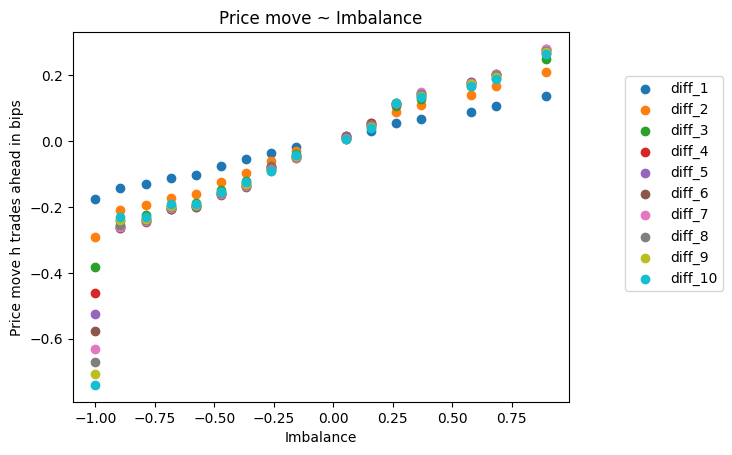

In [7]:
Y = []
for h in range(1,11):
    Y.append(df_asset.groupby(['Imbalance_Cat'])['diff_'+str(h)].mean())
    plt.scatter(np.linspace(-1,1,20),Y[h-1], label = "diff_"+str(h))
plt.xlabel("Imbalance")
plt.ylabel("Price move h trades ahead in bips")
plt.legend(bbox_to_anchor=(1.1, 0.9))
plt.title("Price move ~ Imbalance")
plt.rcParams["figure.figsize"] = (10,8)

<font color='blue'>
L'imbalance permet de déterminer parfaitement le signe de la prochaine transaction. L'amplitude de la variation de prix est monotone en l'imbalance.
</font>

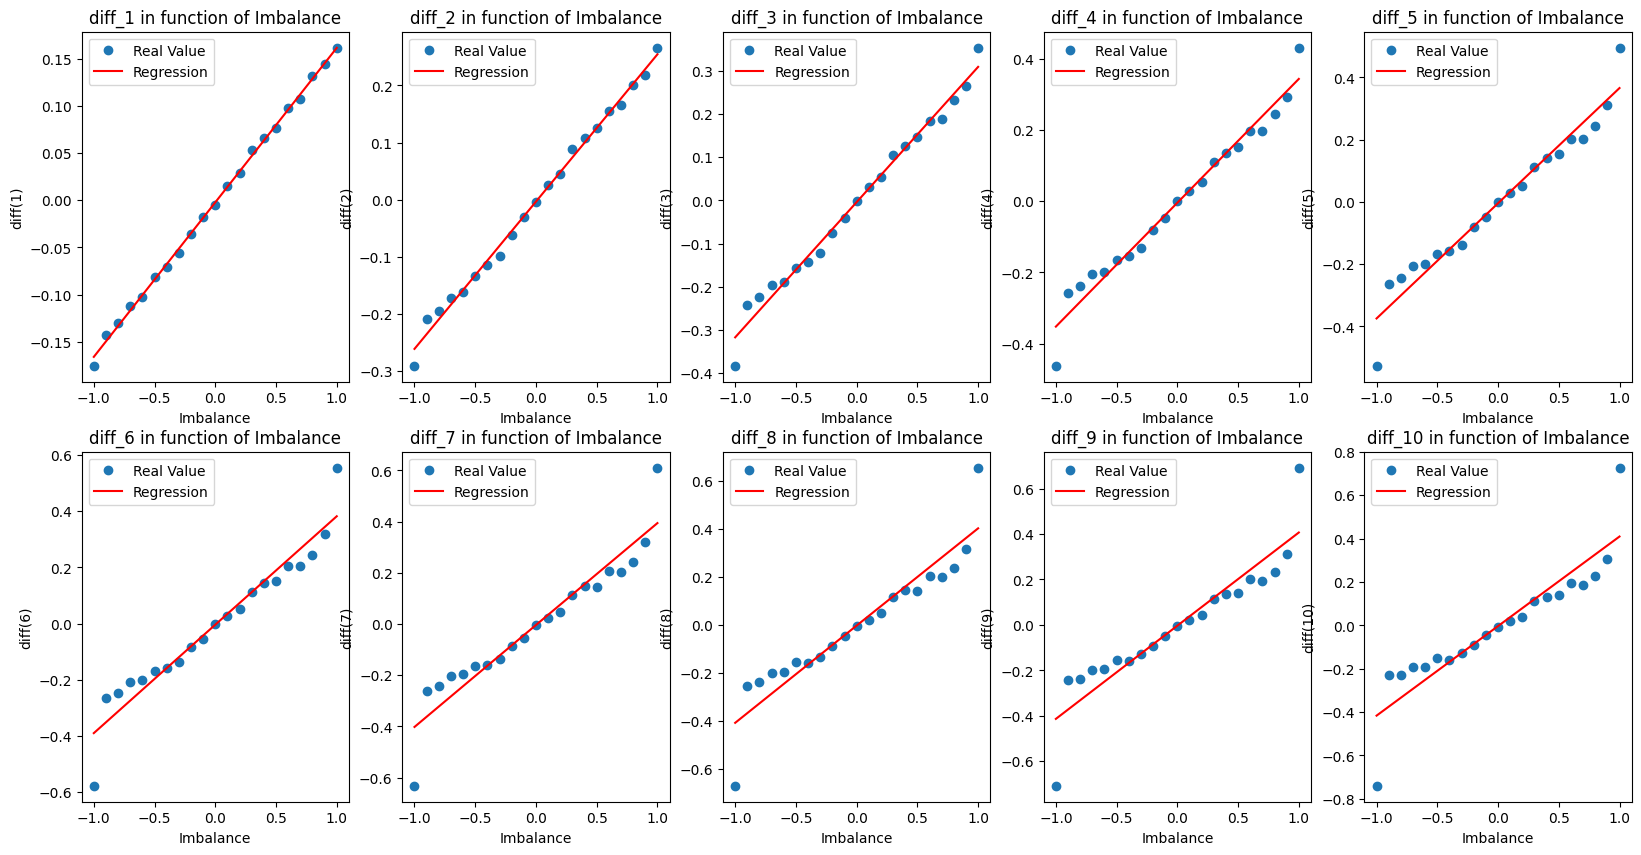

,h,score_r2
0,diff(1),0.998432
1,diff(2),0.994082
2,diff(3),0.984258
3,diff(4),0.967109
4,diff(5),0.946247
5,diff(6),0.923729
6,diff(7),0.895241
7,diff(8),0.870772
8,diff(9),0.845740
9,diff(10),0.820430


In [8]:
scores = {}


fig, axes = plt.subplots(2, 5, figsize=(20, 10))


for h in range(10):
    df_asset_group = df_asset.groupby('Imbalance')[f'diff_{h+1}'].mean()
    df_asset_group.plot(ax= axes[h//5][h%5], ylabel=f'diff({h+1})', label='Real Value', marker='o', linestyle='None')
    x = df_asset_group.index.to_numpy()
    y = df_asset_group.to_numpy()
    x = x.reshape(-1, 1)
    linear_regression = LinearRegression(fit_intercept=True).fit(x, y)
    y_predict = linear_regression.predict(x)
    axes[h//5][h%5].plot(x, y_predict, color='red', label='Regression')
    axes[h//5][h%5].legend()
    axes[h//5][h%5].set_title(f'diff_{h+1} in function of Imbalance')
    scores[f'diff({h+1})'] = linear_regression.score(x,y)

plt.show()

df_scores = pd.DataFrame(list(scores.items()), columns=['h', 'score_r2'])


df_scores

- We observe a strong linear relationship between Imbalance and futur price movement. However the more h increase the less the imbalance is lenearly dependant to the price movement.

- Moreover, we observe that if $Ask$(sellers) is big in comparison to $Bid$(buyers) then the price decreaser. Inversely, if the $Bid$ size increase then the price increase 

## 2. Améliorer le résultats précédent à l'aide de réseaux de neurones et de mémoire sur les signes des transactions

We now want to increase our result obtained with a Linear Regression using a Neural Network. For this we will try to add more features in order to have a better prediction for the NN. However we have to pay attention to not overfit our train data.

We will considering the following variables : 
- the sign of the last 10 transactions (TradedSign)
- the volume of the normalized transaction  by the Average Trading Size (ATS)
- the volume at the best $Bid$ and the best $Ask$

We want to predict using the 10 last transactions, the volumes at the best Bid/Ask, the normalized transaction volume and the imbalance, the futur increase ($diff(h)$) price using a MultiLayer Perceptron with $Pytorch$

### a. Import Pytorch

In [9]:
import torch
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim


### b. Créer un jeu d'entraîement et un jeu de test pour le modèle

Centrer et standardiser les variables et créer votre jeu d'entraînement et votre jeu de test.

In [17]:
len(df_asset)

4759650

In [27]:
df_asset_NN = df_asset.copy()

for h in range(1,11):
        df_asset_NN['TradedSgn_'+str(h)] = df_asset_NN['TradedSign'].shift(h)

# df_asset_NN.dropna(inplace=True)

# # for col in df_asset_NN.select_dtypes(include=['category']).columns:
# #     df_asset_NN[col] = df_asset_NN[col].cat.add_categories([0])

# df_asset_NN = df_asset_NN.fillna(0)
df_asset_NN.head()


,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign,Imbalance,Imbalance_Cat,diff_1,...,TradedSgn_1,TradedSgn_2,TradedSgn_3,TradedSgn_4,TradedSgn_5,TradedSgn_6,TradedSgn_7,TradedSgn_8,TradedSgn_9,TradedSgn_10
Time,,,,,,,,,,,,,,,,,,,,,
2011-01-03 09:00:01.988,40.19,70,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,15,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,67,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,20,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,250,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
average_trading_size = df_asset_NN['TradedQty'].mean()
df_asset_NN['NormTradedQty'] = df_asset_NN['TradedQty'] / average_trading_size
# df_asset_NN.fillna(0, inplace=True)
df_asset_NN.head()

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign,Imbalance,Imbalance_Cat,diff_1,...,TradedSgn_2,TradedSgn_3,TradedSgn_4,TradedSgn_5,TradedSgn_6,TradedSgn_7,TradedSgn_8,TradedSgn_9,TradedSgn_10,NormTradedQty
Time,,,,,,,,,,,,,,,,,,,,,
2011-01-03 09:00:01.988,40.19,70,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264713
2011-01-03 09:00:01.988,40.19,15,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056724
2011-01-03 09:00:01.988,40.19,67,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253368
2011-01-03 09:00:01.988,40.19,20,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075632
2011-01-03 09:00:01.988,40.19,250,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.945404


In [29]:
X = df_asset_NN[[ 'Imbalance', 'NormTradedQty', 
            'AskQty',
            'BidQty',
            'TradedSgn_1', 'TradedSgn_2', 
            'TradedSgn_3', 'TradedSgn_4', 
            'TradedSgn_5', 'TradedSgn_6', 
            'TradedSgn_7', 'TradedSgn_8', 
            'TradedSgn_9', 'TradedSgn_10']]

Y_s = df_asset[[f'diff_{k}' for k in range(1, 11)]]
# We drop the 20 first and 20 last lines to avoid NaN (Otherwise the NN training crashes)
X = X[20:-20]
Y_s = Y_s[20:-20]

X.head()


,Imbalance,NormTradedQty,AskQty,BidQty,TradedSgn_1,TradedSgn_2,TradedSgn_3,TradedSgn_4,TradedSgn_5,TradedSgn_6,TradedSgn_7,TradedSgn_8,TradedSgn_9,TradedSgn_10
Time,,,,,,,,,,,,,,
2011-01-03 09:00:02.010,-0.9,0.155046,40700,660800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-03 09:00:02.010,-0.9,0.056724,40700,660800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-03 09:00:02.010,-0.9,0.272276,40700,660800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-03 09:00:02.010,-0.9,0.189081,40700,660800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-03 09:00:02.010,-0.9,0.030253,40700,660800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


- We group the $Y$ values to predict into $Y_s$. Thus, $Y_s$ contains the 10 columns $diff_1, ... diff_10$ of data to predict with the rows of $X$

- We split the data into a training set and a test set using train_test_split

- Then we normalize $X$ using the scalers of $X_{train}$ and $Y$ using the scalers of $Y_{train}$


In [30]:
from sklearn.model_selection import train_test_split

# We create the train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_s, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
Y_train = torch.tensor(Y_train.values, dtype=torch.float32)
Y_test = torch.tensor(Y_test.values, dtype=torch.float32)

# Generate the scalers
X_scaler = StandardScaler()
Y_scaler_s = [StandardScaler() for _ in range(10)] # We have 1 scaler for each diff(h)

# We fit the scalers
X_scaler.fit(X_train)
for k in range(10):
    Y_scaler_s[k].fit(Y_train[:, k].reshape(-1, 1))

# We transform the data
X_train_norm = X_scaler.transform(X_train)
X_test_norm = X_scaler.transform(X_test)
Y_train_norm_s = [Y_scaler_s[k].transform(Y_train[:, k].reshape(-1, 1)).flatten() for k in range(10)]
Y_test_norm_s = [Y_scaler_s[k].transform(Y_test[:, k].reshape(-1, 1)).flatten() for k in range(10)]
                 
X_train_norm = torch.tensor(X_train_norm, dtype=torch.float32)
X_test_norm = torch.tensor(X_test_norm, dtype=torch.float32)
Y_train_norm_s = [torch.tensor(Y_train_norm_s[k], dtype=torch.float32) for k in range(10)]
Y_test_norm_s = [torch.tensor(Y_test_norm_s[k], dtype=torch.float32) for k in range(10)]

In [31]:
X_train_norm.shape

torch.Size([3807688, 14])

### c. Building the Neural Network

In [32]:
class FeedForwardNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(FeedForwardNet, self).__init__()
        hidden_size1 = 32
        
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size1, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
       

        return x
    
criterion = nn.MSELoss()

In [33]:
ep_list = {}
train_loss_list = {}
test_loss_list = {}
for k in range(10):
    ep_list[k] = []
    train_loss_list[k] = []
    test_loss_list[k] = []

### d. Training our Neural Network

In [34]:
def train_model_k(k, model, X_train, Y_train, X_test, Y_test, epochs=100, lr=0.1):
    # train of the k-th model.
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        Y_pred = model(X_train)
        #print(Y_pred.reshape(-1,1))
        
        loss = criterion(Y_pred.reshape(-1,1), Y_train.reshape(-1,1))
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            model.eval()
            Y_test_pred = model(X_test)
            test_loss = criterion(Y_test_pred.reshape(-1,1), Y_test.reshape(-1,1))
            print(f'Epoch {epoch} - Train Loss: {loss.item()} - Test loss: {test_loss.item()}')

            ep_list[k].append(epoch)
            train_loss_list[k].append(loss.item())
            test_loss_list[k].append(test_loss.item())

    return model

model_list = [FeedForwardNet(X_train_norm.shape[1], 1) for _ in range(10)]

In [37]:
from tqdm import tqdm

for k in tqdm(range(10), desc='Entrainement du NN(h) avec h -> ', unit='model'):
    model_list[k] = train_model_k(k, model_list[k], X_train_norm, Y_train_norm_s[k], X_test_norm, Y_test_norm_s[k])


Entrainement du NN(h) avec h -> :   0%|          | 0/10 [00:00<?, ?model/s]

Epoch 0 - Train Loss: 1.1100424528121948 - Test loss: 2.804086685180664
Epoch 10 - Train Loss: 1.1451305150985718 - Test loss: 1.1838654279708862
Epoch 20 - Train Loss: 1.026699185371399 - Test loss: 1.1911566257476807
Epoch 30 - Train Loss: 1.015041708946228 - Test loss: 1.1485272645950317
Epoch 40 - Train Loss: 1.000502586364746 - Test loss: 1.1358205080032349
Epoch 50 - Train Loss: 0.9951140284538269 - Test loss: 1.13382887840271
Epoch 60 - Train Loss: 0.9944000840187073 - Test loss: 1.1333378553390503
Epoch 70 - Train Loss: 0.9938913583755493 - Test loss: 1.132251501083374
Epoch 80 - Train Loss: 0.993382453918457 - Test loss: 1.131929874420166
Epoch 90 - Train Loss: 0.9931501746177673 - Test loss: 1.1316032409667969


Entrainement du NN(h) avec h -> :  10%|█         | 1/10 [00:50<07:35, 50.59s/model]

Epoch 0 - Train Loss: 1.0663243532180786 - Test loss: 1.4792993068695068
Epoch 10 - Train Loss: 0.9449355602264404 - Test loss: 0.9947221279144287
Epoch 20 - Train Loss: 0.9054146409034729 - Test loss: 0.9797579646110535
Epoch 30 - Train Loss: 0.9021433591842651 - Test loss: 0.9648204445838928
Epoch 40 - Train Loss: 0.8941152095794678 - Test loss: 0.9580404162406921
Epoch 50 - Train Loss: 0.8912509083747864 - Test loss: 0.9565730690956116
Epoch 60 - Train Loss: 0.8898595571517944 - Test loss: 0.9555398225784302
Epoch 70 - Train Loss: 0.8889637589454651 - Test loss: 0.9545560479164124
Epoch 80 - Train Loss: 0.8882870674133301 - Test loss: 0.9539320468902588
Epoch 90 - Train Loss: 0.8878132700920105 - Test loss: 0.9535344243049622


Entrainement du NN(h) avec h -> :  20%|██        | 2/10 [01:38<06:32, 49.01s/model]

Epoch 0 - Train Loss: 0.9950801134109497 - Test loss: 2.3262722492218018
Epoch 10 - Train Loss: 1.0214807987213135 - Test loss: 0.9304466247558594
Epoch 20 - Train Loss: 0.8774328827857971 - Test loss: 0.9303322434425354
Epoch 30 - Train Loss: 0.8674774765968323 - Test loss: 0.9052645564079285
Epoch 40 - Train Loss: 0.8559324145317078 - Test loss: 0.8942057490348816
Epoch 50 - Train Loss: 0.8527109026908875 - Test loss: 0.891300618648529
Epoch 60 - Train Loss: 0.850724458694458 - Test loss: 0.8879662752151489
Epoch 70 - Train Loss: 0.8490332365036011 - Test loss: 0.8862166404724121
Epoch 80 - Train Loss: 0.8478602766990662 - Test loss: 0.8853062987327576
Epoch 90 - Train Loss: 0.8471577763557434 - Test loss: 0.8844878673553467


Entrainement du NN(h) avec h -> :  30%|███       | 3/10 [02:25<05:36, 48.12s/model]

Epoch 0 - Train Loss: 1.0455750226974487 - Test loss: 1.411651372909546
Epoch 10 - Train Loss: 0.8734896183013916 - Test loss: 0.9456746578216553
Epoch 20 - Train Loss: 0.8597549200057983 - Test loss: 0.8826338052749634
Epoch 30 - Train Loss: 0.8398830890655518 - Test loss: 0.8679714202880859
Epoch 40 - Train Loss: 0.8302435278892517 - Test loss: 0.8562529683113098
Epoch 50 - Train Loss: 0.8260443210601807 - Test loss: 0.854562520980835
Epoch 60 - Train Loss: 0.8242878913879395 - Test loss: 0.8524428606033325
Epoch 70 - Train Loss: 0.8233783841133118 - Test loss: 0.8517045378684998
Epoch 80 - Train Loss: 0.822731077671051 - Test loss: 0.8509989976882935
Epoch 90 - Train Loss: 0.8222254514694214 - Test loss: 0.8504769802093506


Entrainement du NN(h) avec h -> :  40%|████      | 4/10 [03:10<04:42, 47.01s/model]

Epoch 0 - Train Loss: 1.0145922899246216 - Test loss: 1.3775373697280884
Epoch 10 - Train Loss: 0.9216528534889221 - Test loss: 0.9346967339515686
Epoch 20 - Train Loss: 0.8357877731323242 - Test loss: 0.84989994764328
Epoch 30 - Train Loss: 0.816211462020874 - Test loss: 0.8408335447311401
Epoch 40 - Train Loss: 0.8111422061920166 - Test loss: 0.8336954116821289
Epoch 50 - Train Loss: 0.8077192306518555 - Test loss: 0.830949604511261
Epoch 60 - Train Loss: 0.8066673278808594 - Test loss: 0.8295859694480896
Epoch 70 - Train Loss: 0.8057528734207153 - Test loss: 0.828682541847229
Epoch 80 - Train Loss: 0.8050026893615723 - Test loss: 0.8279502987861633
Epoch 90 - Train Loss: 0.804421067237854 - Test loss: 0.8273922204971313


Entrainement du NN(h) avec h -> :  50%|█████     | 5/10 [03:56<03:52, 46.43s/model]

Epoch 0 - Train Loss: 1.2487094402313232 - Test loss: 1.3051642179489136
Epoch 10 - Train Loss: 0.8961625695228577 - Test loss: 0.9616023302078247
Epoch 20 - Train Loss: 0.812806248664856 - Test loss: 0.8491659760475159
Epoch 30 - Train Loss: 0.8086832761764526 - Test loss: 0.8267732262611389
Epoch 40 - Train Loss: 0.8014966249465942 - Test loss: 0.8211930990219116
Epoch 50 - Train Loss: 0.7982279658317566 - Test loss: 0.8173012137413025
Epoch 60 - Train Loss: 0.7957249283790588 - Test loss: 0.8159606456756592
Epoch 70 - Train Loss: 0.7945481538772583 - Test loss: 0.8150845766067505
Epoch 80 - Train Loss: 0.7937257289886475 - Test loss: 0.814093828201294
Epoch 90 - Train Loss: 0.7931020259857178 - Test loss: 0.8135702013969421


Entrainement du NN(h) avec h -> :  60%|██████    | 6/10 [04:42<03:05, 46.41s/model]

Epoch 0 - Train Loss: 1.0399290323257446 - Test loss: 1.8823782205581665
Epoch 10 - Train Loss: 0.9564656019210815 - Test loss: 0.8429076671600342
Epoch 20 - Train Loss: 0.8137186169624329 - Test loss: 0.831031858921051
Epoch 30 - Train Loss: 0.7998655438423157 - Test loss: 0.8061227202415466
Epoch 40 - Train Loss: 0.7947375178337097 - Test loss: 0.7994128465652466
Epoch 50 - Train Loss: 0.7889241576194763 - Test loss: 0.7948476672172546
Epoch 60 - Train Loss: 0.7880204319953918 - Test loss: 0.7930538654327393
Epoch 70 - Train Loss: 0.7863331437110901 - Test loss: 0.7918574213981628
Epoch 80 - Train Loss: 0.7853841185569763 - Test loss: 0.7909755110740662
Epoch 90 - Train Loss: 0.7848174571990967 - Test loss: 0.7903894782066345


Entrainement du NN(h) avec h -> :  70%|███████   | 7/10 [05:29<02:19, 46.55s/model]

Epoch 0 - Train Loss: 1.093600869178772 - Test loss: 2.0397584438323975
Epoch 10 - Train Loss: 1.014122486114502 - Test loss: 0.8999248743057251
Epoch 20 - Train Loss: 0.8297269344329834 - Test loss: 0.821010947227478
Epoch 30 - Train Loss: 0.790844738483429 - Test loss: 0.8054606914520264
Epoch 40 - Train Loss: 0.7841492295265198 - Test loss: 0.7965347766876221
Epoch 50 - Train Loss: 0.7828245162963867 - Test loss: 0.7954882383346558
Epoch 60 - Train Loss: 0.7808288335800171 - Test loss: 0.7929161787033081
Epoch 70 - Train Loss: 0.7791549563407898 - Test loss: 0.791526734828949
Epoch 80 - Train Loss: 0.7784640789031982 - Test loss: 0.7907216548919678
Epoch 90 - Train Loss: 0.7777461409568787 - Test loss: 0.7900965809822083


Entrainement du NN(h) avec h -> :  80%|████████  | 8/10 [06:17<01:34, 47.05s/model]

Epoch 0 - Train Loss: 1.0253046751022339 - Test loss: 2.103259325027466
Epoch 10 - Train Loss: 1.0074939727783203 - Test loss: 0.9005658030509949
Epoch 20 - Train Loss: 0.8435605764389038 - Test loss: 0.8262184858322144
Epoch 30 - Train Loss: 0.7842907309532166 - Test loss: 0.7955703139305115
Epoch 40 - Train Loss: 0.7808221578598022 - Test loss: 0.7827230095863342
Epoch 50 - Train Loss: 0.7780388593673706 - Test loss: 0.7827887535095215
Epoch 60 - Train Loss: 0.7752996683120728 - Test loss: 0.7798677086830139
Epoch 70 - Train Loss: 0.7744635343551636 - Test loss: 0.7789211869239807
Epoch 80 - Train Loss: 0.7736576795578003 - Test loss: 0.7781651020050049
Epoch 90 - Train Loss: 0.7729884386062622 - Test loss: 0.7774949073791504


Entrainement du NN(h) avec h -> :  90%|█████████ | 9/10 [07:05<00:47, 47.45s/model]

Epoch 0 - Train Loss: 1.0714980363845825 - Test loss: 2.836235523223877
Epoch 10 - Train Loss: 1.02178156375885 - Test loss: 1.0494329929351807
Epoch 20 - Train Loss: 0.8401281237602234 - Test loss: 0.8323816061019897
Epoch 30 - Train Loss: 0.7866131067276001 - Test loss: 0.7818984389305115
Epoch 40 - Train Loss: 0.7778179049491882 - Test loss: 0.7747243046760559
Epoch 50 - Train Loss: 0.7749304175376892 - Test loss: 0.7727288603782654
Epoch 60 - Train Loss: 0.7724296450614929 - Test loss: 0.7702907919883728
Epoch 70 - Train Loss: 0.7705984711647034 - Test loss: 0.7692744135856628
Epoch 80 - Train Loss: 0.7695195078849792 - Test loss: 0.7681760787963867
Epoch 90 - Train Loss: 0.7686489820480347 - Test loss: 0.7674190402030945


Entrainement du NN(h) avec h -> : 100%|██████████| 10/10 [07:52<00:00, 47.24s/model]


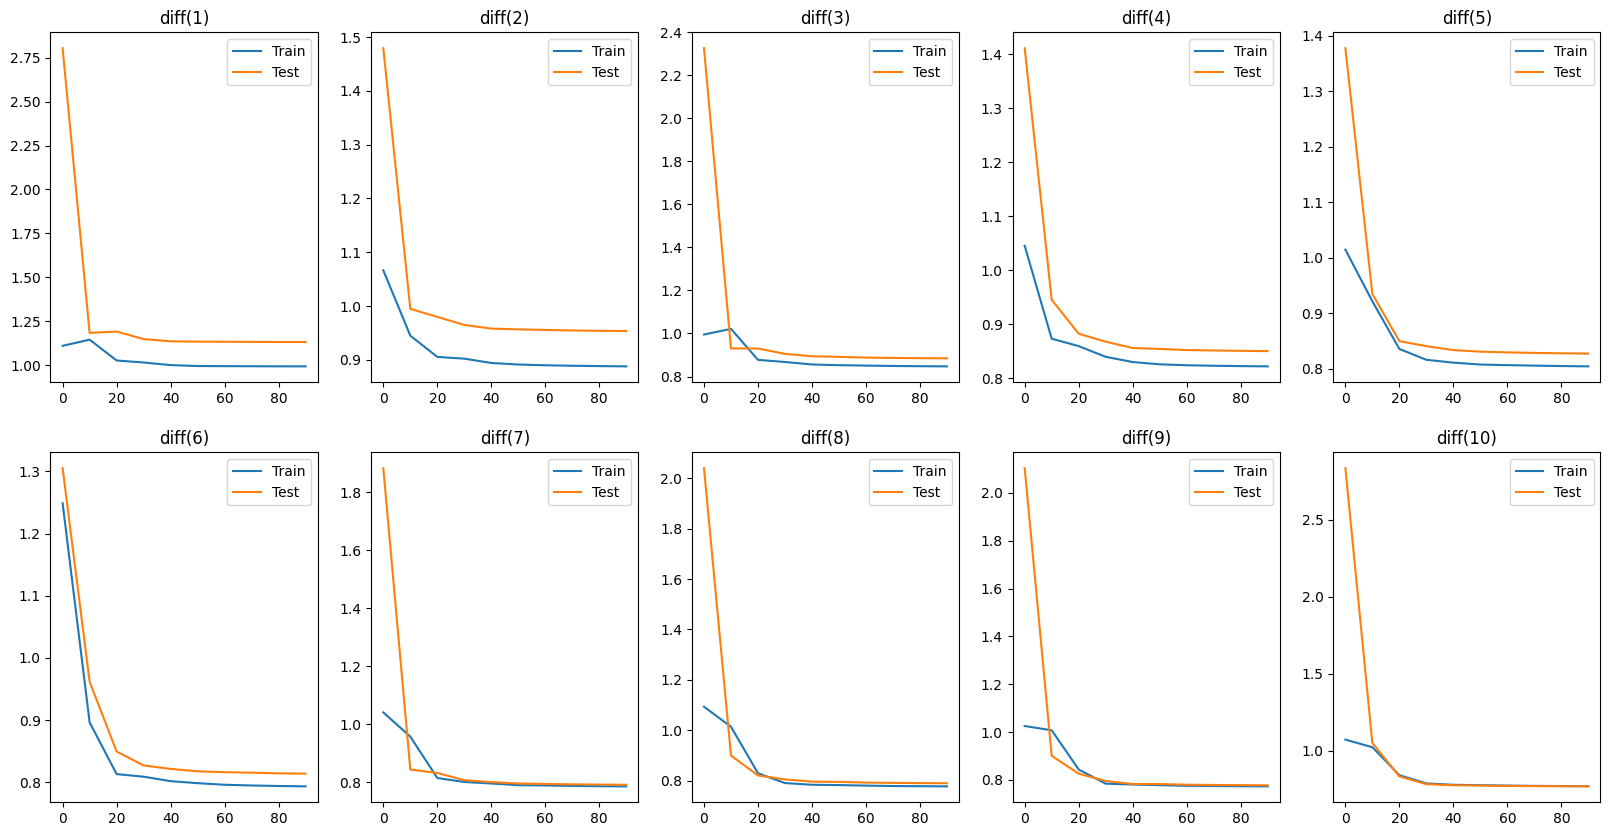

In [38]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for k in range(10) :
    axes[k//5][k%5].plot(ep_list[k], train_loss_list[k], label='Train')
    axes[k//5][k%5].plot(ep_list[k], test_loss_list[k], label='Test')
    axes[k//5][k%5].legend()
    axes[k//5][k%5].set_title(f'diff({k+1})')

plt.show()

### e. Evaluation of our NN

In [39]:
from sklearn.metrics import r2_score

h_list = [k for k in range(1, 11)]
score_train = {}
Y_train_pred_list = {}

for k in range(10):
    Y_train_pred = Y_scaler_s[k].inverse_transform(model_list[k](X_train_norm).detach().numpy())

    Y_train_pred_list[k] = pd.Series(Y_train_pred.flatten())

    score_train[k] = r2_score(Y_train[:, k], Y_train_pred)

reg_lin_scores = pd.DataFrame.from_dict(scores, orient='index', columns=['R2'])
nn_score_train = pd.DataFrame.from_dict(score_train, orient='index', columns=['R2'])

In [40]:
Y_pred_df = pd.DataFrame()
for k in range(10):
    Y_pred_df[f'diff({k+1})'] = Y_train_pred_list[k]

Y_true_df = pd.DataFrame()
for k in range(10):
    Y_true_df[f'diff({k+1})'] = Y_train[:, k]

Imbalance_df = pd.DataFrame()
Imbalance_df['Imbalance'] = X_train[:, 0].detach().numpy()

df_total_true = pd.concat([Imbalance_df, Y_true_df], axis=1)
df_total_pred = pd.concat([Imbalance_df, Y_pred_df], axis=1)

df_total_true_groupby = df_total_true.groupby('Imbalance').mean()
df_total_pred_groupby = df_total_pred.groupby('Imbalance').mean()

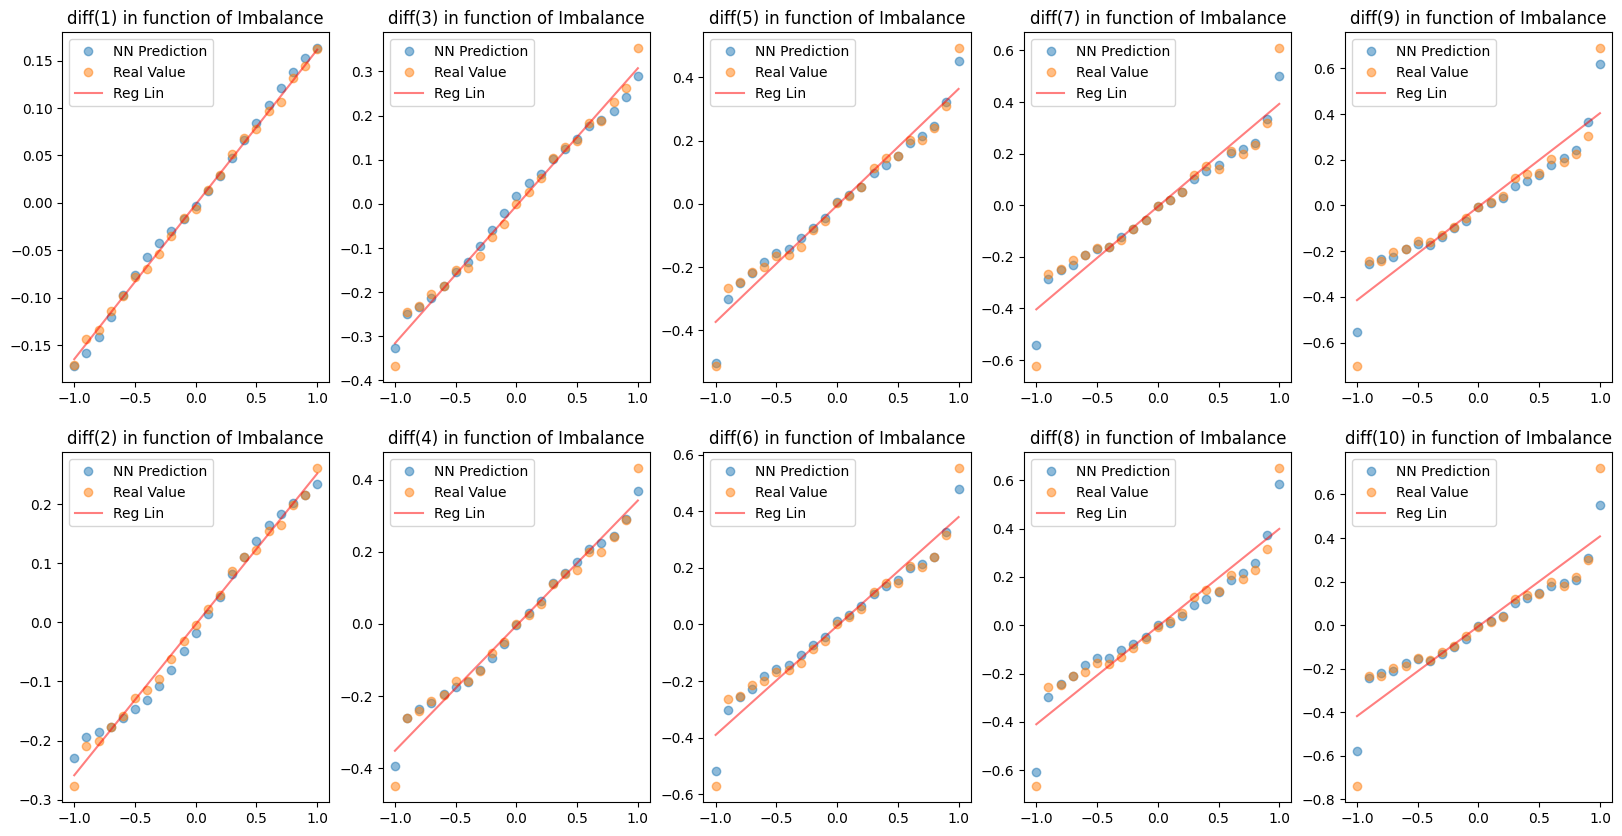

In [61]:
scores_NN = {}
scores_reglin = {}

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for k in range(10) :
    
  #NN
  axes[k%2,k//2].plot(df_total_pred_groupby.index, df_total_pred_groupby[f'diff({k+1})'], label='NN Prediction', marker='o', linestyle='None', alpha=0.5)
  axes[k%2,k//2].legend()
  axes[k%2,k//2].set_title(f'NN prediction : diff({k+1}) in function of Imbalance')

  scores_NN[f'diff({k+1})'] = r2_score(df_total_true_groupby[f'diff({k+1})'], df_total_pred_groupby[f'diff({k+1})'])

  #Reg lin
  axes[k%2,k//2].plot(df_total_true_groupby.index, df_total_true_groupby[f'diff({k+1})'], label='Real Value', marker='o', linestyle='None', alpha=0.5)
  
  x_ref = df_total_true_groupby.index.to_numpy()
  y_ref = df_total_true_groupby[f'diff({k+1})']
  x_ref = x_ref.reshape(-1, 1)
  linear_regression = LinearRegression(fit_intercept=True).fit(x_ref, y_ref)
  y_predict = linear_regression.predict(x)
  axes[k%2,k//2].plot(np.array(x_ref), y_predict, color='red', label='Reg Lin', alpha=0.5)
  axes[k%2,k//2].legend()
  axes[k%2,k//2].set_title(f'diff({k+1}) in function of Imbalance')

  scores_reglin[f'diff({k+1})'] = linear_regression.score(x_ref,y_ref)
plt.show()


Visually we observe that the Neural Network performs better when $h$ increases than the linear Regression. 

In [62]:
df_scores = pd.DataFrame(list(scores_reglin.items()), columns=['h', 'score_r2_reg_lin'])
df_scores['score_r2_NN'] = list(scores_NN.values())
df_scores

,h,score_r2_reg_lin,score_r2_NN
0,diff(1),0.998789,0.994866
1,diff(2),0.995908,0.988132
2,diff(3),0.987258,0.987892
3,diff(4),0.970156,0.990359
4,diff(5),0.950205,0.994831
5,diff(6),0.925300,0.989725
6,diff(7),0.898700,0.984490
7,diff(8),0.872727,0.985189
8,diff(9),0.847362,0.976135
9,diff(10),0.822703,0.963787


### f. Evaluation on the Test Set : 

In [63]:
h_list = [k for k in range(1, 11)]
score_test = {}
Y_test_pred_list = {}

for k in range(10):
    Y_test_pred = Y_scaler_s[k].inverse_transform(model_list[k](X_test_norm).detach().numpy())

    Y_test_pred_list[k] = pd.Series(Y_test_pred.flatten())

    score_test[k] = r2_score(Y_test[:, k], Y_test_pred)

reg_lin_scores = pd.DataFrame.from_dict(scores, orient='index', columns=['R2'])
nn_scores_test = pd.DataFrame.from_dict(score_test, orient='index', columns=['R2'])

In [64]:
Y_pred_df = pd.DataFrame()
for k in range(10):
    Y_pred_df[f'diff({k+1})'] = Y_test_pred_list[k]

Y_true_df = pd.DataFrame()
for k in range(10):
    Y_true_df[f'diff({k+1})'] = Y_test[:, k]

Imbalance_df = pd.DataFrame()
Imbalance_df['Imbalance'] = X_test[:, 0].detach().numpy()

df_total_true = pd.concat([Imbalance_df, Y_true_df], axis=1)
df_total_pred = pd.concat([Imbalance_df, Y_pred_df], axis=1)

df_total_true_groupby = df_total_true.groupby('Imbalance').mean()
df_total_pred_groupby = df_total_pred.groupby('Imbalance').mean()

### g. Analysis of results

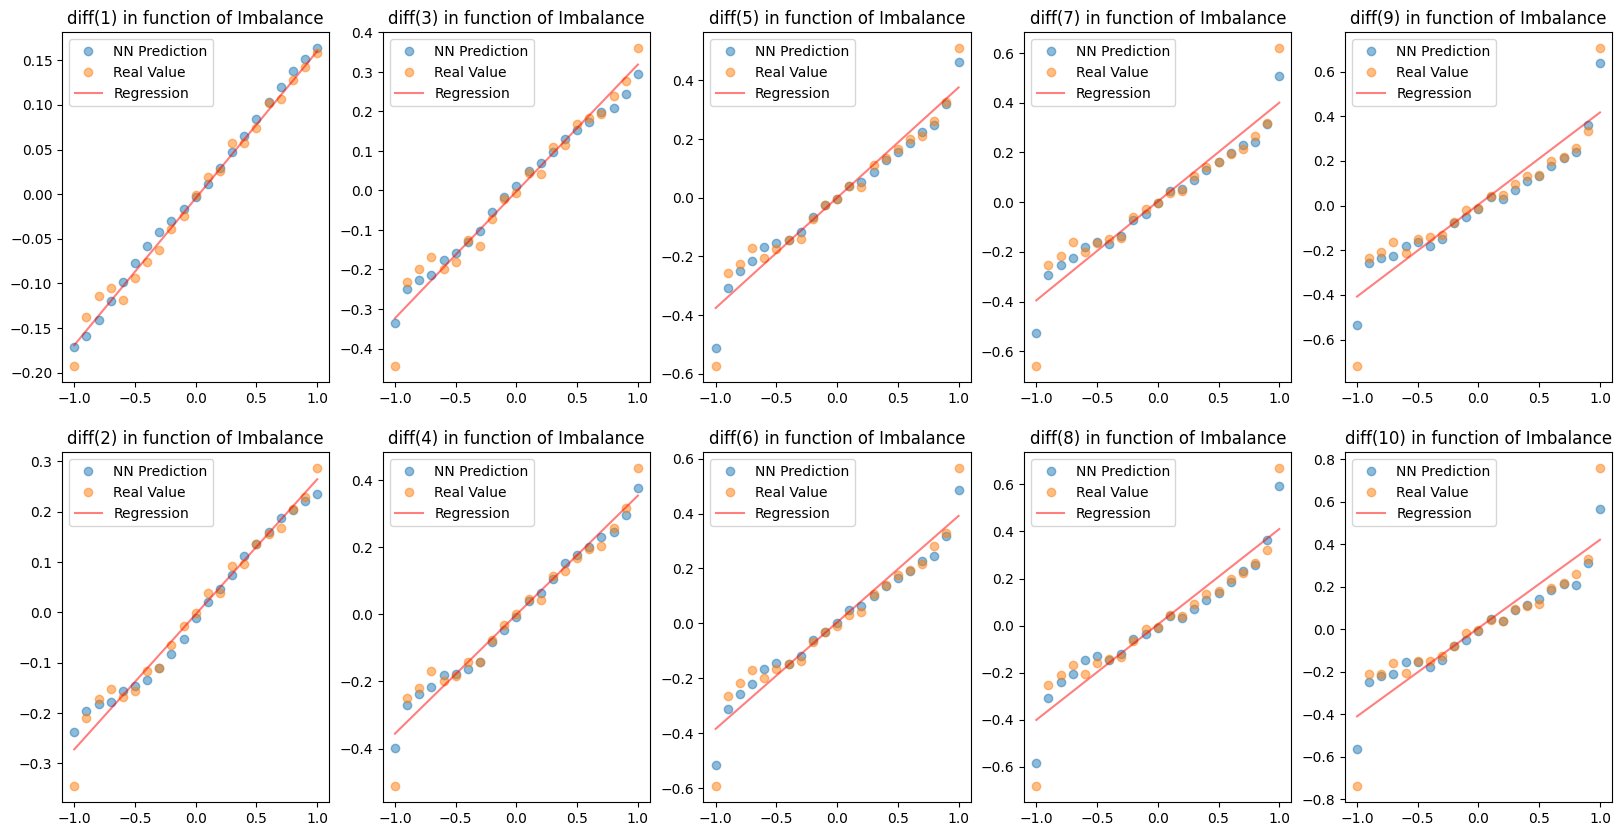

In [68]:
scores_NN = {}
scores_reglin = {}

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for k in range(10) :
    
  #NN
  axes[k%2,k//2].plot(df_total_pred_groupby.index, df_total_pred_groupby[f'diff({k+1})'], label='NN Prediction', marker='o', linestyle='None', alpha=0.5)
  axes[k%2,k//2].legend()
  axes[k%2,k//2].set_title(f'NN prediction : diff({k+1}) in function of Imbalance')

  scores_NN[f'diff({k+1})'] = r2_score(df_total_true_groupby[f'diff({k+1})'], df_total_pred_groupby[f'diff({k+1})'])

  #Reg lin
  axes[k%2,k//2].plot(df_total_true_groupby.index, df_total_true_groupby[f'diff({k+1})'], label='Real Value', marker='o', linestyle='None', alpha=0.5)
  
  x_ref = df_total_true_groupby.index.to_numpy()
  y_ref = df_total_true_groupby[f'diff({k+1})']
  x_ref = x_ref.reshape(-1, 1)
  linear_regression = LinearRegression(fit_intercept=True).fit(x_ref, y_ref)
  y_predict = linear_regression.predict(x)  
  axes[k%2,k//2].plot(np.array(x_ref), y_predict, color='red', label='Regression', alpha=0.5)
  axes[k%2,k//2].legend()
  axes[k%2,k//2].set_title(f'diff({k+1}) in function of Imbalance')

  scores_reglin[f'diff({k+1})'] = linear_regression.score(x_ref,y_ref)
plt.show()

We observe the same results than for the traning dataset, that is to say, the Neural Network seems to be better at fitting the curve, especially for large h 

In [69]:
df_scores = pd.DataFrame(list(scores_reglin.items()), columns=['h', 'score_r2_reg_lin'])
df_scores['score_r2_NN'] = list(scores_NN.values())
df_scores

,h,score_r2_reg_lin,score_r2_NN
0,diff(1),0.989358,0.980374
1,diff(2),0.977332,0.967647
2,diff(3),0.961336,0.968291
3,diff(4),0.948570,0.977202
4,diff(5),0.925861,0.986412
5,diff(6),0.913126,0.981220
6,diff(7),0.877027,0.971019
7,diff(8),0.858836,0.980404
8,diff(9),0.835929,0.967638
9,diff(10),0.807567,0.950710


Based on the above results, we can deduce that that NN is generally better to predict movement prices based on the imbalance. We can, however observe that for $h=1$ the liear regression seems a bit better.

To improve the result, we can find a better architecture for the NN and also find better parameter for this Neural Network with a fine-tuning. We can also add features from the orderbook or create new features based on existing features. 